# Pole Structure and Analytic Domains of Lévy Characteristic Functions

**Author:** Davis Koebig Griffin  

**Purpose:**  
Analyze the pole and singularity structure of Lévy characteristic functions
(Variance Gamma and CGMY) in the complex plane.

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## Variance Gamma Pole Structure

The VG characteristic function is

$$
\phi_{VG}(z) =
\left(1 - i\theta \nu z + \tfrac{1}{2}\sigma^2 \nu z^2\right)^{-T/\nu}.
$$

In [7]:
z = sp.symbols('z', complex=True)
T, sigma, nu, theta = sp.symbols('T sigma nu theta', positive=True, real=True)

denominator = 1 - sp.I*theta*nu*z + sp.Rational(1,2)*sigma**2*nu*z**2
poles_sym = sp.solve(denominator, z)

poles_sym

[I*(sqrt(nu)*theta - sqrt(nu*theta**2 + 2*sigma**2))/(sqrt(nu)*sigma**2),
 I*(sqrt(nu)*theta + sqrt(nu*theta**2 + 2*sigma**2))/(sqrt(nu)*sigma**2)]

The poles are given explicitly by

$$
z_{\pm} =m
\frac{i\theta \pm \sqrt{2\sigma^2/\nu - \theta^2}}{\sigma^2}.
$$

Key observations:

- Poles are purely imaginary when $2\sigma^2/\nu > \theta^2$
- The analytic strip is the region
  $$
  \Im(z_-) < \Im(z) < \Im(z_+)
  $$
- The strip width shrinks as \(\nu\) increases

In [8]:
# Numerical parameters (same as Notebook 01)
T_val = 1.0
sigma_val = 0.2
nu_val = 0.2
theta_val = -0.1

den_num = 1 - sp.I*theta_val*nu_val*z + 0.5*sigma_val**2*nu_val*z**2
poles_num = sp.solve(den_num, z)

poles_num

[-18.5078105935821*I, 13.5078105935821*I]

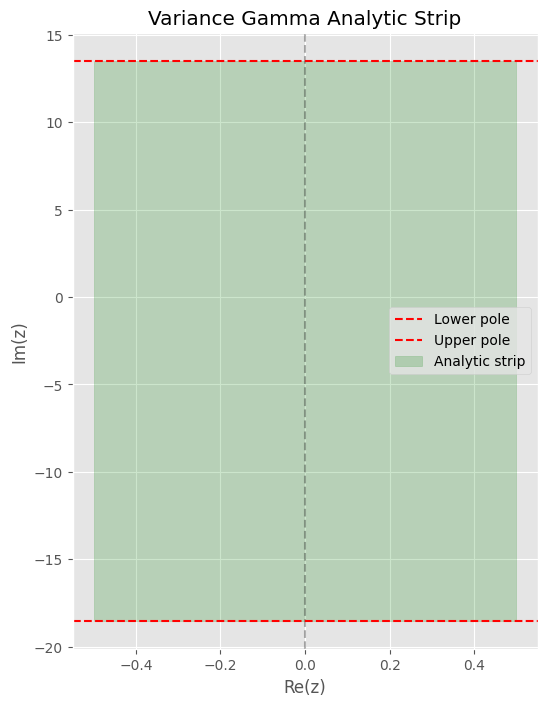

In [9]:
pole_imags = [complex(p).imag for p in poles_num]

plt.figure(figsize=(6, 8))
plt.axvline(0, color='black', linestyle='--', alpha=0.3)
plt.axhline(pole_imags[0], color='red', linestyle='--', label='Lower pole')
plt.axhline(pole_imags[1], color='red', linestyle='--', label='Upper pole')
plt.fill_betweenx(
    y=[pole_imags[0], pole_imags[1]],
    x1=-0.5, x2=0.5,
    color='green', alpha=0.2,
    label='Analytic strip'
)

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Variance Gamma Analytic Strip")
plt.legend()
plt.show()

## 3. Parameter Sensitivity

The pole locations depend strongly on:

- **Volatility σ**: increases strip width
- **Variance rate ν**: decreases strip width
- **Drift θ**: shifts the strip asymmetrically

This directly impacts whether contour deformation is possible
without crossing singularities.

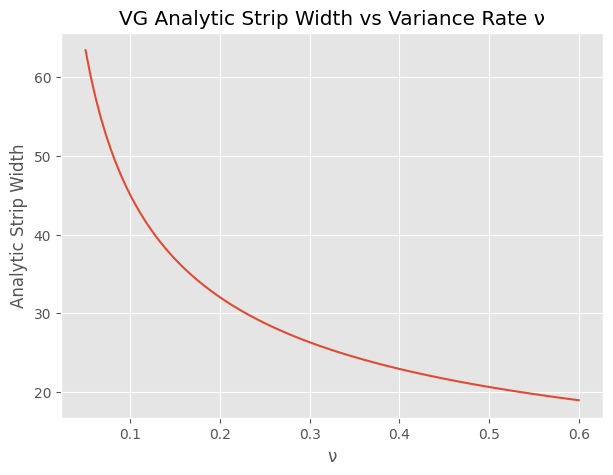

In [10]:
nu_grid = np.linspace(0.05, 0.6, 100)
strip_widths = []

for nu_i in nu_grid:
    den_i = 1 - sp.I*theta_val*nu_i*z + 0.5*sigma_val**2*nu_i*z**2
    poles_i = sp.solve(den_i, z)
    im_vals = sorted([complex(p).imag for p in poles_i])
    strip_widths.append(im_vals[1] - im_vals[0])

plt.figure(figsize=(7, 5))
plt.plot(nu_grid, strip_widths)
plt.xlabel("ν")
plt.ylabel("Analytic Strip Width")
plt.title("VG Analytic Strip Width vs Variance Rate ν")
plt.show()

## 4. CGMY Singularities

The CGMY characteristic function is

$$
\phi_{CGMY}(z) =
\exp\left(
T C \Gamma(-Y)
\left[
(M - iz)^Y - M^Y + (G + iz)^Y - G^Y
\right]
\right).
$$

Unlike VG:

- Singularities arise from **fractional powers**
- Branch points occur at:
  $$
  z = \pm iM, \quad z = \pm iG
  $$
- There are **no isolated poles**, only branch cuts

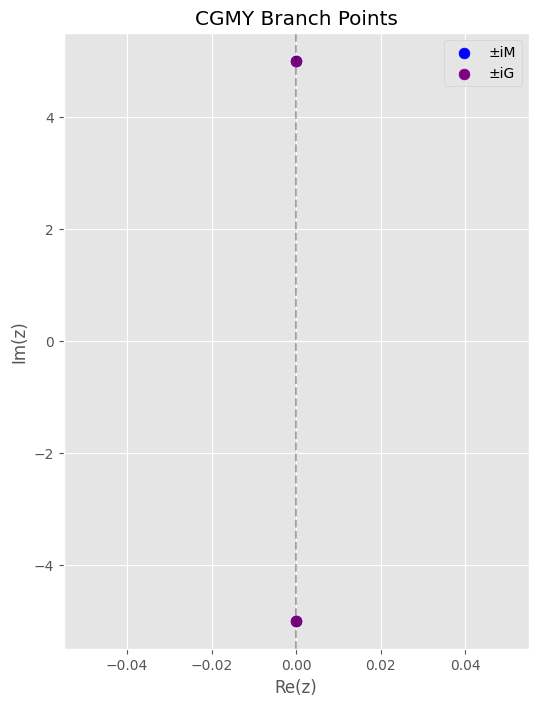

In [11]:
G_val = 5.0
M_val = 5.0

plt.figure(figsize=(6, 8))
plt.axvline(0, color='black', linestyle='--', alpha=0.3)
plt.scatter([0, 0], [M_val, -M_val], color='blue', s=60, label='±iM')
plt.scatter([0, 0], [G_val, -G_val], color='purple', s=60, label='±iG')

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("CGMY Branch Points")
plt.legend()
plt.show()

## 5. Implications for Fourier Inversion

- **VG Model**
  - Contours may be shifted vertically within the analytic strip
  - Crossing poles introduces residue terms
  - Enables residue-based pricing corrections

- **CGMY Model**
  - Branch cuts prevent simple contour shifts
  - Residue methods generally fail
  - FFT pricing must respect branch structure

This distinction motivates the comparative analysis
in subsequent notebooks.

## Summary

- VG characteristic functions possess isolated poles
  that define a clear analytic strip.
- CGMY characteristic functions exhibit branch points
  and lack isolated poles.
- Analytic structure fundamentally determines which
  numerical pricing methods are valid.

This notebook establishes the analytic foundation
for contour deformation and residue pricing experiments
in later sections.